### Инструкция по выполнению проекта:

Вы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

У вас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Вам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отричательно влияют на привлечение пользователей.

#### Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info.csv
 -   /datasets/orders_info.csv
 -   /datasets/costs_info.csv

#### Шаг 2. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

#### Шаг 3. Постройте отчёты и посчитайте метрики
Продукт:

-    Сколько людей пользуются в день, неделю, месяц?
-    Сколько сессий в день?
-    Сколько длится одна сессия?

Продажи:

- Когда люди начинают покупать?
- Сколько покупок делает в среднем платящий пользователь за месяц, неделю, день?
- Какой средний чек за месяц, неделю, день?

Маркетинг:

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

#### Шаг 4. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

#### Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

Подумайте, нужно ли включать в анализ органических пользователей?

#### Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

#### Оформление: 
Задание выполните в Jupyter Notebook. Программный код заполните в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.


#### Описание данных
Таблица visits (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

# Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info.csv
 -   /datasets/orders_info.csv
 -   /datasets/costs_info.csv

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

visits, orders, costs = (
    pd.read_csv('/datasets/visits_info.csv'), 
    pd.read_csv('/datasets/orders_info.csv'),  
    pd.read_csv('/datasets/costs_info.csv'),  
)

In [2]:
display(visits.head(5))
display(orders.head(5))
display(costs.head(5))

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,01.05.2019 02:36,01.05.2019 02:45
1,278965908054,United States,iPhone,organic,01.05.2019 04:46,01.05.2019 04:47
2,590706206550,United States,Mac,organic,01.05.2019 14:09,01.05.2019 15:32
3,326433527971,United States,Android,TipTop,01.05.2019 00:29,01.05.2019 00:54
4,349773784594,United States,Mac,organic,01.05.2019 03:33,01.05.2019 03:57


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [3]:
#Преобразуем данные о вермени и переименуем некоторые названия столбцов


In [4]:
visits = (
    visits.rename(columns={'User Id': 'user_id', 'Region': 'region', 'Device': 'device', 
                           'Channel': 'channel', 'Session Start': 'session_start',
                           'Session End': 'session_end'})
)
 
orders = orders.rename(columns={'User Id': 'user_id', 'Event Dt': 'event_dt', 'Revenue': 'revenue'})
 
costs = costs.rename(columns={'Channel': 'channel'})

display(visits.head(1))
display(orders.head(1))
display(costs.head(1))

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,01.05.2019 02:36,01.05.2019 02:45


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3


In [5]:
time_format = '%d.%m.%Y %H:%M'

visits['session_start'] = pd.to_datetime(visits['session_start'], format = time_format)
visits['session_end'] = pd.to_datetime(visits['session_end'], format = time_format)
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [6]:
display(visits.head(1))
display(orders.head(1))
display(costs.head(1))

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:00,2019-05-01 02:45:00


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3


Проверим нет ли повтором или некорретных записей в значениях столбцов Region	Device	Channel	 Channel

In [7]:
print(visits['region'].unique())
print(visits['device'].unique())

print(visits['channel'].unique())
print(costs['channel'].unique())



['United States' 'UK' 'France' 'Germany']
['iPhone' 'Mac' 'Android' 'PC']
['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']
['FaceBoom' 'MediaTornado' 'RocketSuperAds' 'TipTop' 'YRabbit'
 'AdNonSense' 'LeapBob' 'OppleCreativeMedia' 'WahooNetBanner'
 'lambdaMediaAds']


Вывод: вроде все хорошо, дублей нет 

In [8]:
display(visits.duplicated().sum())
display(orders.duplicated().sum())
display(costs.duplicated().sum())

0

0

0

In [9]:
display(visits.info())
display(orders.info())
display(costs.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
user_id          309901 non-null int64
region           309901 non-null object
device           309901 non-null object
channel          309901 non-null object
session_start    309901 non-null datetime64[ns]
session_end      309901 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
user_id     40212 non-null int64
event_dt    40212 non-null datetime64[ns]
revenue     40212 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
dt         1800 non-null object
channel    1800 non-null object
costs      1800 non-null float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

# Шаг 2. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [10]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

In [11]:
profiles = get_profiles(visits, orders,None, costs)
print(profiles.head(5)) 

    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:00    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:00    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:00     organic  iPhone         France   
3  22593348 2019-08-22 21:35:00  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:00     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  


**Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?**

In [12]:
total_visits_region=profiles.groupby('region').nunique()['user_id']
total_visits_region=total_visits_region.reset_index()
total_visits_region=total_visits_region.rename(columns={'user_id':'total'})

total_visits_region


,region,total
0,France,17450
1,Germany,14981
2,UK,17575
3,United States,100002


In [13]:
region_structure = profiles.groupby(['region','payer']).nunique()['user_id'].reset_index()

region_structure=region_structure.merge(total_visits_region, on='region',how='left')


region_structure['share']=region_structure['user_id']/region_structure['total']*100
region_structure

,region,payer,user_id,total,share
0,France,False,16787,17450,96.200573
1,France,True,663,17450,3.799427
2,Germany,False,14365,14981,95.888125
3,Germany,True,616,14981,4.111875
4,UK,False,16875,17575,96.017070
5,UK,True,700,17575,3.982930
6,United States,False,93100,100002,93.098138
7,United States,True,6902,100002,6.901862




<div class="alert alert-info"> 
<b>Комментарий студента</b> 

    **Вывод:** В структуре всех пользователей более 50% - пользвотели из США, 
Конверсия в платещях подьзователе по странам:
Франция - 3,7
Германия -  4
UK - 3,9
США - 6,9

Вывод-  в платящих подьзователей лучше всего конвертятся пользователи из США
</div>


**Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?**


In [14]:
#profiles.groupby('device').nunique()['user_id']

device_total=profiles.pivot_table(
index='device',
values='user_id',
aggfunc={'user_id':'nunique'})
device_total=device_total.reset_index()
device_total=device_total.rename(columns={'user_id':'total_device'})


#total_user_id=profiles['user_id'].nunique()

#device['share']=device['user_id']/total_user_id*100



device = profiles.groupby(['device','payer']).nunique()['user_id'].reset_index()


device=device.merge(device_total, on='device',how='left')


device['share']=device['user_id']/device['total_device']*100
device

,device,payer,user_id,total_device,share
0,Android,False,32982,35032,94.148207
1,Android,True,2050,35032,5.851793
2,Mac,False,28130,30042,93.635577
3,Mac,True,1912,30042,6.364423
4,PC,False,28918,30455,94.953210
5,PC,True,1537,30455,5.046790
6,iPhone,False,51097,54479,93.792103
7,iPhone,True,3382,54479,6.207897


In [15]:
device_payer=profiles.pivot_table(
index=['payer','device'],
values='user_id',
aggfunc={'user_id':'nunique'})

total_user_id=profiles['user_id'].nunique()

device_payer['share']=device_payer['user_id']/total_user_id*100
device_payer


user_id      share
payer device                     
False Android    32982  21.986827
      Mac        28130  18.752333
      PC         28918  19.277639
      iPhone     51097  34.062850
True  Android     2050   1.366594
      Mac         1912   1.274599
      PC          1537   1.024612
      iPhone      3382   2.254546

**Вывод:** В структуре всех пользователей более 36% - доля айфонов, остальный устройства в равных долях (примерно по 20%)
    Платящи пользователи тоже чазе всего заходят с айфонов

<div class="alert alert-info"> 
<b>Комментарий студента</b> 
В платящих пользователей лучше всего конверятируются ползоватили Маков и айфоно    
</div>

**По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?**


In [16]:
chanel_tablt=profiles.pivot_table(
index='channel',
values='user_id',
aggfunc={'user_id':'nunique'})

chanel_tablt['share']=chanel_tablt['user_id']/total_user_id*100
chanel_tablt.sort_values('share', ascending=False)

,user_id,share
channel,,
organic,56439,37.623993
FaceBoom,29144,19.428297
TipTop,19561,13.039971
OppleCreativeMedia,8605,5.736361
LeapBob,8553,5.701696
WahooNetBanner,8553,5.701696
RocketSuperAds,4448,2.965175
MediaTornado,4364,2.909178
YRabbit,4312,2.874513


In [17]:
chanel_payer=profiles.pivot_table(
index=['payer','channel'],
values='user_id',
aggfunc={'user_id':'nunique'})

chanel_payer['share']=chanel_payer['user_id']/total_user_id*100
chanel_payer.sort_values('share', ascending=False).query('payer==True ')


user_id     share
payer channel                              
True  FaceBoom               3557  2.371207
      TipTop                 1878  1.251933
      organic                1160  0.773292
      WahooNetBanner          453  0.301984
      AdNonSense              440  0.293318
      RocketSuperAds          352  0.234654
      LeapBob                 262  0.174657
      OppleCreativeMedia      233  0.155325
      lambdaMediaAds          225  0.149992
      YRabbit                 165  0.109994
      MediaTornado            156  0.103994

In [18]:
# ячейка ревьюера:
(profiles
 .groupby('channel') # группируем по каналу
 .agg({
     'user_id':'nunique', # считаем количество пользователей всего
     'payer':'sum' # считаем количество платящих - тут True будет как 1
 })
 .assign(conversion = (lambda x: round(x['payer'] / x['user_id']*100))) # считаем конверсию: делим платящих на общее количество
)

,user_id,payer,conversion
channel,,,
AdNonSense,3880,440.0,11.0
FaceBoom,29144,3557.0,12.0
LeapBob,8553,262.0,3.0
MediaTornado,4364,156.0,4.0
OppleCreativeMedia,8605,233.0,3.0
RocketSuperAds,4448,352.0,8.0
TipTop,19561,1878.0,10.0
WahooNetBanner,8553,453.0,5.0
YRabbit,4312,165.0,4.0


In [19]:
channel_total=profiles.pivot_table(
index='channel',
values='user_id',
aggfunc={'user_id':'nunique'})
channel_total=channel_total.reset_index()
channel_total=channel_total.rename(columns={'user_id':'total_channel'})


chan_tabl = profiles.groupby(['channel','payer']).nunique()['user_id'].reset_index()


chan_tabl=chan_tabl.merge(channel_total, on='channel',how='left')


chan_tabl['share']=chan_tabl['user_id']/chan_tabl['total_channel']*100
chan_tabl

,channel,payer,user_id,total_channel,share
0,AdNonSense,False,3440,3880,88.659794
1,AdNonSense,True,440,3880,11.340206
2,FaceBoom,False,25587,29144,87.795086
3,FaceBoom,True,3557,29144,12.204914
4,LeapBob,False,8291,8553,96.936747
5,LeapBob,True,262,8553,3.063253
6,MediaTornado,False,4208,4364,96.425298
7,MediaTornado,True,156,4364,3.574702
8,OppleCreativeMedia,False,8372,8605,97.292272
9,OppleCreativeMedia,True,233,8605,2.707728


<div class="alert alert-info"> 
<b>Комментарий студента</b> 
    
   Конверсия в платящих пользователей по каналам.
    
   Важно выделить плохо работающую органику 
   Из платных каналов хорошо работают : FaceBoom - 12 проц конверсии 
    TipTop хуже - 9.6 
    
    
   Рекомендация - подумать над масштабированием каналов, с высокой конверсией: AdNonSense, lambdaMediaAds
  
</div>

In [20]:
print(profiles['first_ts'].min())
profiles['first_ts'].max()

2019-05-01 00:00:00


Timestamp('2019-10-27 23:59:00')

Определите минимальную и максимальную дату привлечения пользователей.
маинимальная дата - 1 мая
максимальная 12 октября

# Шаг 3. Постройте отчёты и посчитайте метрики
Продукт:

-    Сколько людей пользуются в день, неделю, месяц?
-    Сколько сессий в день?
-    Сколько длится одна сессия?

Продажи:

- Когда люди начинают покупать?
- Сколько покупок делает в среднем платящий пользователь за месяц, неделю, день?
- Какой средний чек за месяц, неделю, день?

Маркетинг:

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

### Продукт:
-    Сколько людей пользуются в день, неделю, месяц?

In [21]:

visits['day']    = visits['session_start'].dt.day
visits['week']   = visits['session_start'].dt.week
visits['month']  = visits['session_start'].dt.month
visits['year']   = visits['session_start'].dt.year

visits.head(1)

,user_id,region,device,channel,session_start,session_end,day,week,month,year
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:00,2019-05-01 02:45:00,1,18,5,2019


In [22]:
dau_total =(
    visits.groupby(['month','day'])
    .agg({'user_id': 'nunique'})
    .mean()
)


mau_total = (
    visits.groupby(['year', 'month'])
    .agg({'user_id': 'nunique'})
    .mean()
)


wau_total =(
    visits.groupby(['year', 'week'])
    .agg({'user_id': 'nunique'})
    .mean()
)


print('DAU', dau_total, 'уникальных пользователей\n','WAU', wau_total,'уникальных пользователей \n',
     'MAU', mau_total,'уникальных пользователей')

DAU user_id    1684.23913
dtype: float64 уникальных пользователей
 WAU user_id    8353.777778
dtype: float64 уникальных пользователей 
 MAU user_id    28989.166667
dtype: float64 уникальных пользователей


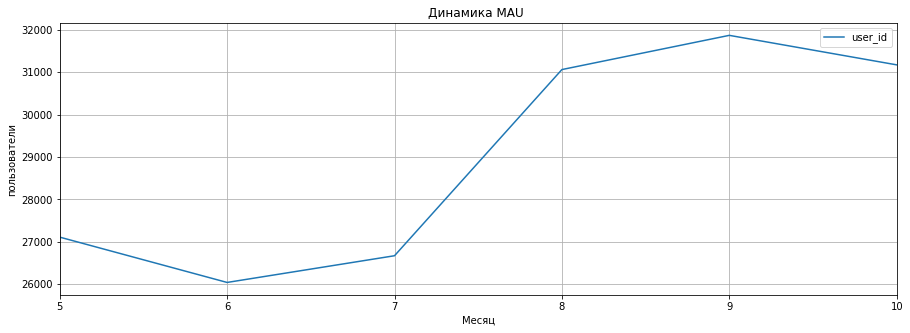

In [23]:
visits.groupby('month').agg({'user_id': 'nunique'}).plot(grid=True, figsize=(15, 5))
plt.xlabel('Месяц')
plt.ylabel('пользователи')
plt.title('Динамика MAU ')
plt.show()



-    Сколько длится одна сессия?

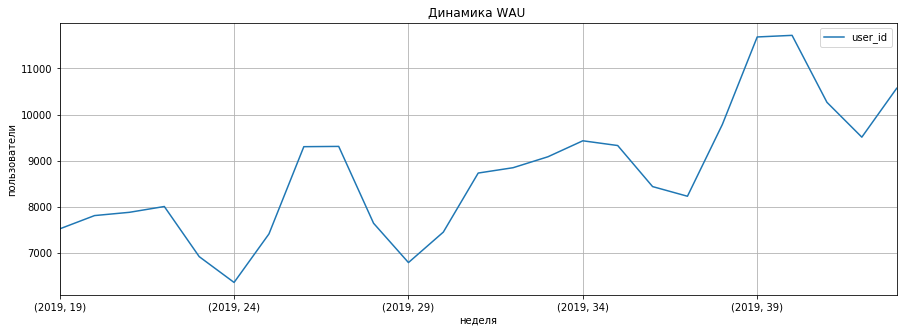

In [24]:
#visits.groupby('week').agg({'user_id': 'nunique'}).plot(grid=True, figsize=(15, 5))


tab_1=(visits.groupby(['year', 'week']).agg({'user_id': 'nunique', 'day' : 'nunique'}).query('day ==7')).drop('day',axis=1)


tab_1.plot(grid=True, figsize=(15, 5))

plt.xlabel('неделя')
plt.ylabel('пользователи')
plt.title('Динамика WAU ')
plt.show()



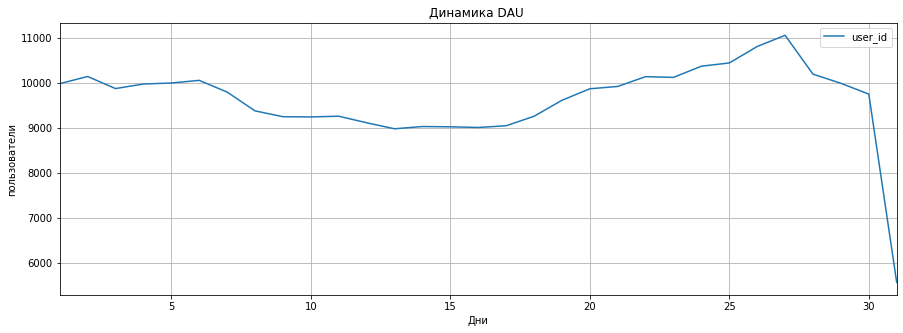

In [25]:
visits.groupby('day').agg({'user_id': 'nunique'}).plot(grid=True, figsize=(15, 5))
plt.xlabel('Дни')
plt.ylabel('пользователи')
plt.title('Динамика DAU ')
plt.show()

**Выводы:
Средняя динамика пользователей по месяц имеет тенденцию к росту , активный рост начинается с июля
Динамика по неделям показывает циклические 4-х недельные волны, возможно спад и рост активности как то связан с циклами недель внутри месяца.
Ежедневная активность имеет наименее явно выраженное изменение

Изучите число пользовательских сессий. Постройте гистограмму, отражающую распределение общего числа сессий в день, и выведите среднее количество сессий в день. Изучать изменение этой метрики во времени необязательно.

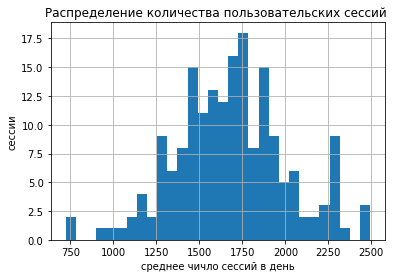

In [26]:
table=visits.groupby(['month','week','day']).agg({'session_start': 'count'})

table['session_start'].hist(bins=30)
plt.xlabel('среднее чичло сессий в день')
plt.ylabel('сессии')

plt.title('Распределение количества пользовательских сессий ')
plt.show()


In [27]:
#среднее количество сессия в дент
table=visits.groupby(['month']).agg({'day': 'nunique'})
total_day=table['day'].sum()

total_session=visits['session_start'].count()

average_day_session=total_session/total_day

average_day_session

1684.2445652173913

**Вывод: график распределения среднего количества сессий в день похож на нормальное распределение**

в среднем в день 1684 сессии

Узнайте, сколько длится одна сессия. Постройте гистограмму, отражающую распределение длительности сессий. Применяя метод describe(), постройте таблицу с параметрами распределения. Изучать изменение этой метрики во времени необязательно.

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:208: FutureWarning: Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version
  return func(*args, **kwargs)


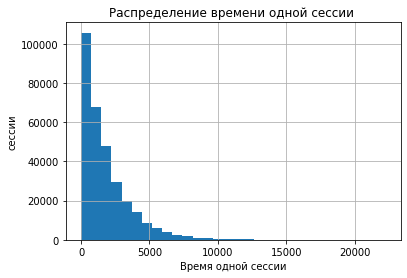

In [28]:
visits['len_session']=visits['session_end']-visits['session_start']
visits.head(5)

#visits['len_session'] = pd.to_datetime(visits['len_session'])

visits['len_session_secunds'] = pd.to_datetime(visits['len_session']).dt.hour *3600+pd.to_datetime(visits['len_session']).dt.minute *60+ pd.to_datetime(visits['len_session']).dt.second
visits['len_session_secunds'].hist(bins=30)
plt.xlabel('Время одной сессии')
plt.ylabel('сессии')
plt.title('Распределение времени одной сессии ')
plt.show()


In [29]:
visits['len_session_secunds'].describe()

count    309901.000000
mean       1800.084801
std        1803.189827
min           0.000000
25%         540.000000
50%        1260.000000
75%        2520.000000
max       22260.000000
Name: len_session_secunds, dtype: float64

<div class="alert alert-info"> 
<b>Комментарий студента</b> 
    
Вывод: Среднее время одной сессии 30 минут
</div>

### Продажи:

- Когда люди начинают покупать?

- Сколько покупок делает в среднем платящий пользователь за месяц, неделю, день?

- Какой средний чек за месяц, неделю, день?

Исследуйте, сколько времени в среднем проходит с момента первого посещения до покупки. Изучать изменение этой метрики во времени необязательно.

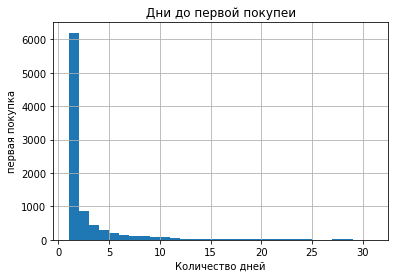

In [30]:

sales=orders.merge(visits, on ='user_id')



first_purchase=sales.groupby('user_id').agg({'session_start': 'min','event_dt':'min'})
sales.head(3)

first_purchase['time_tp_purchase']=first_purchase['event_dt']-first_purchase['session_start']

first_purchase['day']=pd.to_datetime(first_purchase['time_tp_purchase']).dt.day

first_purchase.head(3)
first_purchase['day'].hist(bins=30)
plt.xlabel('Количество дней')
plt.ylabel('первая покупка')
plt.title(' Дни до первой покупеи ')
plt.show()


In [31]:
first_purchase['day'].describe()


count    8881.000000
mean        2.411328
std         3.604714
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        31.000000
Name: day, dtype: float64

**Вывод: В среднем проходи около 2х дней до первой покупки в приложении**

In [32]:
first_purchase['time_tp_purchase'].describe()

count                      8881
mean     1 days 21:11:50.693052
std      6 days 00:52:20.165837
min             0 days 00:00:00
25%             0 days 00:00:41
50%             0 days 00:01:10
75%             1 days 11:28:52
max           132 days 03:54:55
Name: time_tp_purchase, dtype: object

Рассчитайте среднее число покупок на одного покупателя за день, неделю и месяц. Постройте графики изменения этих метрик во времени.

In [33]:
orders.head(1)

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99


In [34]:
col=orders['event_dt'].astype('datetime64[M]')
orders.groupby(['user_id', col]).agg({'event_dt': 'count'}).mean()


event_dt    2.182233
dtype: float64

Среднее число покупок на одного покупателя за месяц 2

In [35]:
col=orders['event_dt'].astype('datetime64[W]')
orders.groupby(['user_id', col]).agg({'event_dt': 'count'}).mean()

event_dt    1.311674
dtype: float64

Среднее число покупок на одного покупателя за неделю 1

In [36]:
col=orders['event_dt'].astype('datetime64[D]')
orders.groupby(['user_id', col]).agg({'event_dt': 'count'}).mean()

event_dt    1.00005
dtype: float64

Среднее число покупок на одного покупателя за день 1.
Наверное, можно сделать вывод, что пользователи покупают 1 раз в неделю и 2 раза в месяц. 

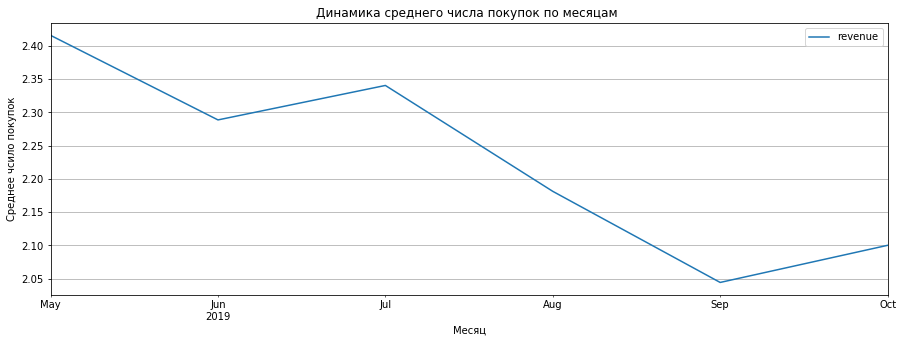

In [37]:
orders['month']=orders['event_dt'].astype('datetime64[M]')



orders.groupby('month').agg({'user_id': 'nunique'})
tab_3=orders.groupby(['month','user_id']).agg({'revenue': 'count'})
tab_3.reset_index().groupby('month').agg({'revenue':'mean'}).plot(grid=True, figsize=(15, 5))
plt.xlabel('Месяц')
plt.ylabel('Среднее чсило покупок')
plt.title('Динамика среднего числа покупок по месяцам ')
plt.show()

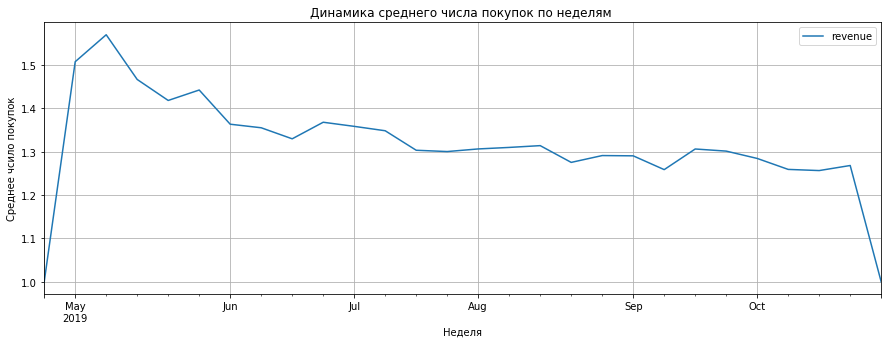

In [38]:
orders['week']=orders['event_dt'].astype('datetime64[W]')

orders.groupby('week').agg({'user_id': 'nunique'})
tab_4=orders.groupby(['week','user_id']).agg({'revenue': 'count'})
tab_4.reset_index().groupby('week').agg({'revenue':'mean'}).plot(grid=True, figsize=(15, 5))
plt.xlabel('Неделя')
plt.ylabel('Среднее чсило покупок')
plt.title('Динамика среднего числа покупок по неделям ')
plt.show()

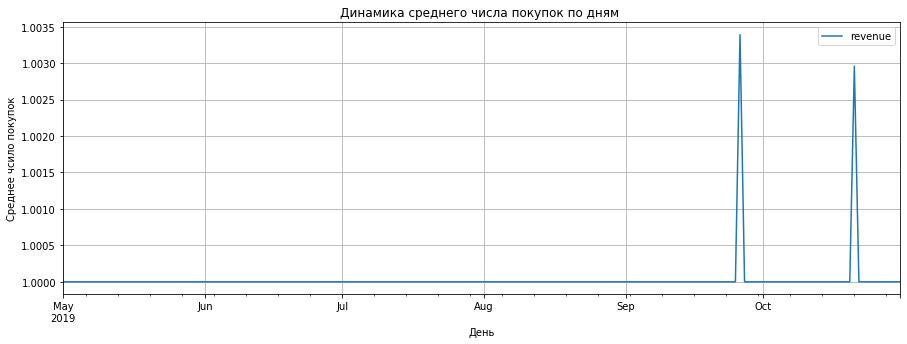

In [39]:
orders['day']=orders['event_dt'].astype('datetime64[D]')

orders.groupby('day').agg({'user_id': 'nunique'})
tab_5=orders.groupby(['day','user_id']).agg({'revenue': 'count'})
tab_5.reset_index().groupby('day').agg({'revenue':'mean'}).plot(grid=True, figsize=(15, 5))
plt.xlabel('День')
plt.ylabel('Среднее чсило покупок')
plt.title('Динамика среднего числа покупок по дням ')
plt.show()

<div class="alert alert-info"> 
<b>Комментарий студента</b> 
    
Вывод: Динамика по дням: Ежедневные покупки стаблильны на уровне 1000 шт, с 2 резкими всплесками в октябре и ноябре. Нужно изучать детальнее, что именно происходило
    
Еженедельная динамика  - падающий тренд
Месячная динамика - с июля месяца резкий спад

</div>

In [40]:
sales.head(1)

,user_id,event_dt,revenue,region,device,channel,session_start,session_end,day,week,month,year,len_session,len_session_secunds
0,188246423999,2019-05-01 23:09:52,4.99,United States,Android,FaceBoom,2019-05-01 23:09:00,2019-05-01 23:21:00,1,18,5,2019,00:12:00,720


In [41]:
sales['day_dt']    = sales['event_dt'].dt.day
sales['week_dt']   = sales['event_dt'].dt.week
sales['month_dt']  = sales['event_dt'].dt.month


average_check_week=sales.groupby('week_dt').agg({'revenue': 'mean'}).mean()

average_check_day=sales.groupby('day_dt').agg({'revenue': 'mean'}).mean()

average_check_month=sales.groupby('month_dt').agg({'revenue': 'mean'}).mean()

print('Средний чек за день', average_check_day, '\n','Средний чек за неделю', average_check_week, '\n', 'средний чек за месяц',average_check_month )



Средний чек за день revenue    5.373091
dtype: float64 
 Средний чек за неделю revenue    5.379988
dtype: float64 
 средний чек за месяц revenue    5.375107
dtype: float64


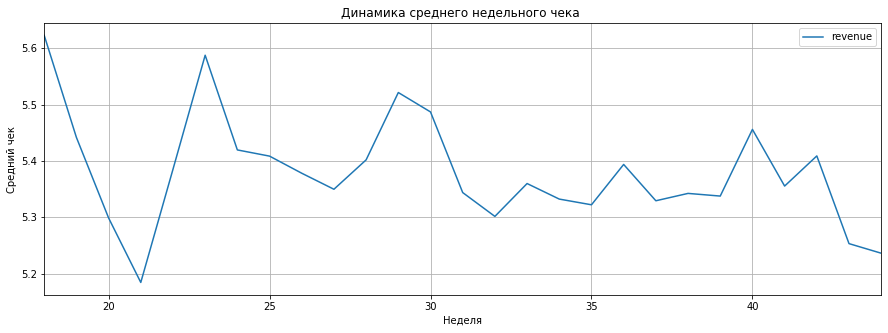

In [42]:
sales.groupby('week_dt').agg({'revenue': 'mean'}).plot(grid=True, figsize=(15, 5))
plt.xlabel('Неделя')
plt.ylabel('Средний чек')

plt.title('Динамика среднего недельного чека ')
plt.show()

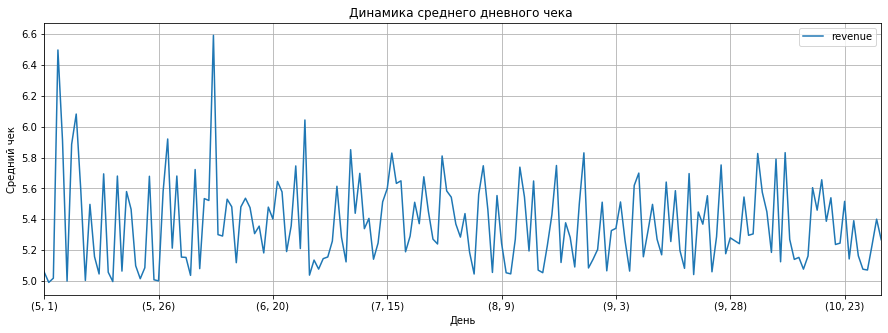

In [43]:
sales.groupby(['month_dt','day_dt']).agg({'revenue': 'mean'}).plot(grid=True, figsize=(15, 5))
plt.xlabel('День')
plt.ylabel('Средний чек')

plt.title('Динамика среднего дневного чека ')
plt.show()

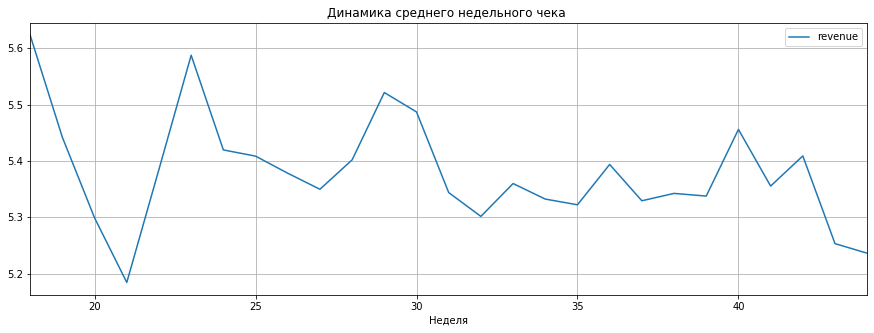

In [44]:
sales.groupby('week_dt').agg({'revenue': 'mean'}).plot(grid=True, figsize=(15, 5))
plt.xlabel('Неделя')
plt.title('Динамика среднего недельного чека ')
plt.show()

Вывод: в августе что то сломалось в приложении или в системе продвижения. И резкий провал в среднем чеке

### Маркетинг:

- Сколько денег потратили? Всего / на каждый источник / по времени

Посчитайте общую сумму расходов на маркетинг. Выясните, как траты распределены по источникам. Визуализируйте изменения метрик во времени.

In [45]:
costs.head(1)

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3


In [46]:
costs['costs'].sum()

105497.30000000002

In [47]:
costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs',ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Больше всего денег потратили на рекламу в 2х моц сетях: TipTop и FaceBoom

In [48]:
#costs['dt'] = pd.to_datetime(costs['dt']).dt.date
#costs['week'] = costs['dt'].dt.week
costs.head(1)
#costs.query('channel== "TipTop"').groupby('week').agg({'costs': 'sum'}).plot(grid=True, figsize=(15, 5))

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3


Разберемся со стоимостью привелчения одного пользователя

In [49]:

profiles.head(1)



,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:00,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172


У нас уже в таблице с профилями посчитана средняя стоимость привлечения одного клиета
Но брать срденее от среднего это не верно? 

In [50]:
profiles.groupby('channel').agg({'acquisition_cost':'mean'})

,acquisition_cost
channel,
AdNonSense,1.008054
FaceBoom,1.113286
LeapBob,0.210172
MediaTornado,0.218717
OppleCreativeMedia,0.250000
RocketSuperAds,0.412095
TipTop,2.799003
WahooNetBanner,0.602245
YRabbit,0.218975


Вывод: стоиомсть привлечения пользователей из TipTop в 2Б7 раз выше чем из FaceBoom (самые популярные источники привлечения) 

# Шаг 4. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

In [51]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [52]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [53]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [54]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [55]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 


In [56]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [57]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

# Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Проанализируйте общую окупаемость рекламы

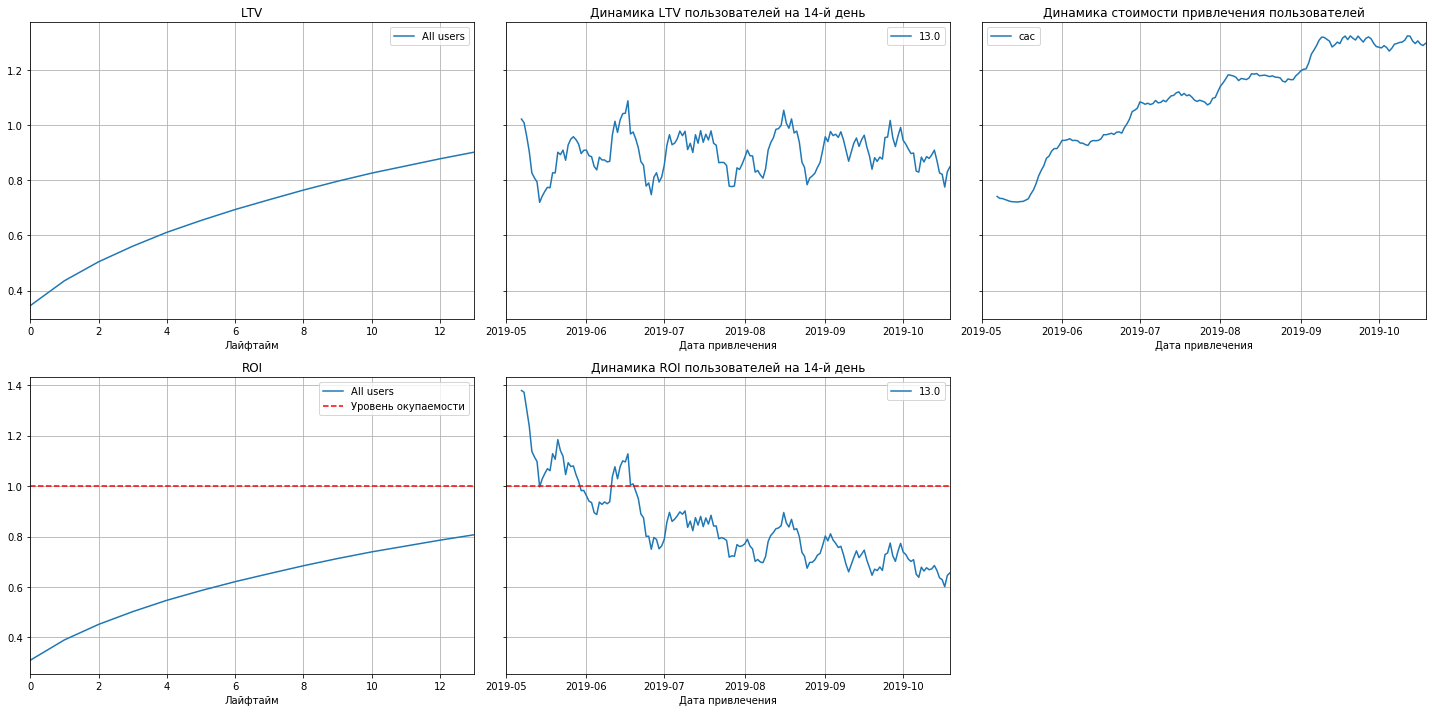

In [58]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 
profiles = profiles.query('channel != "organic"')

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Вывод:
1. Стоимость привлечения растет с июня по ноябрь. Это проблема.
2. Пользователь за 14 дней не окупается (а по бизнес плану должен)
3. Что самое главное - на старте ROIна  14 день был вполне хорош. Сто то сломалось с июля месяца (или реклама или приложение) Надо расследовать дальше. 

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

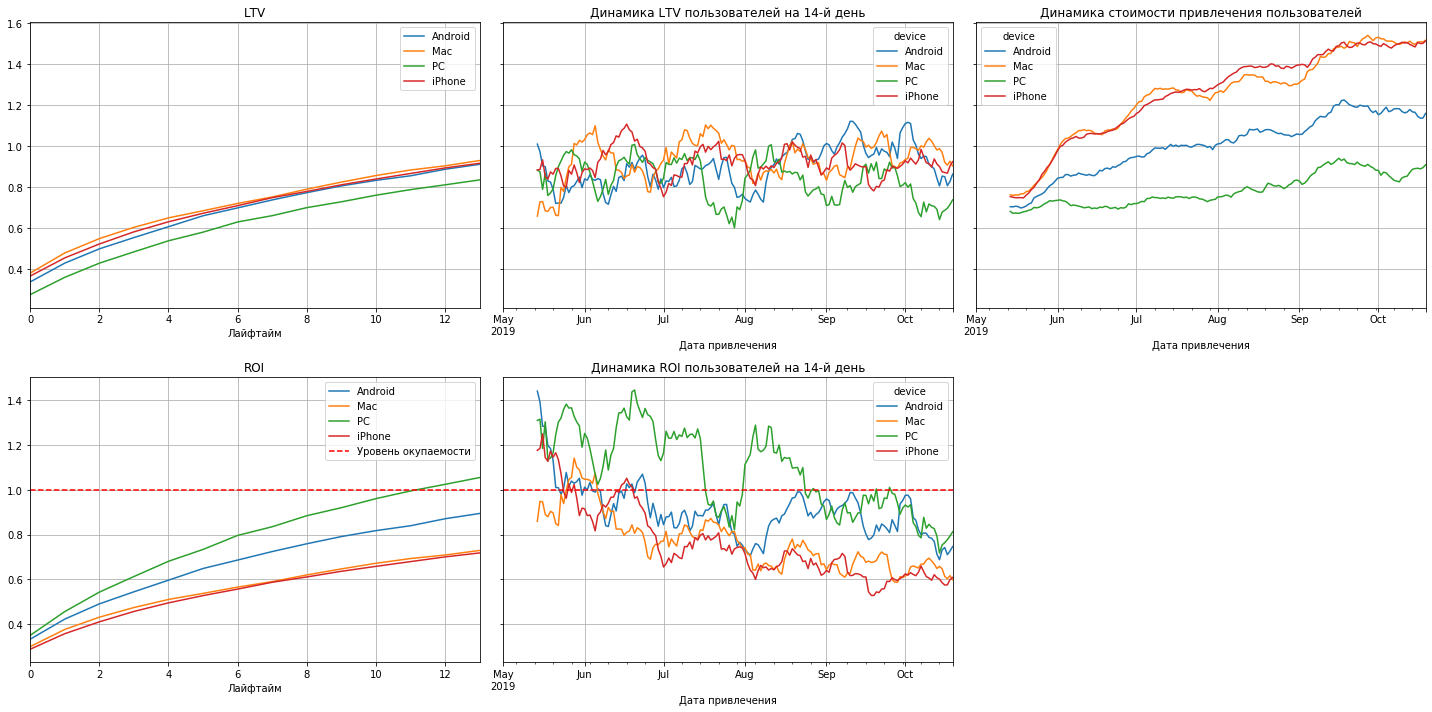

In [59]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Вывод:
1. Проблема с айфонами и маками и андройдами- именно по ним ROI отрицательный. (но на них болье всего привлечено пользвоателей)
2. В целом и по другим устройствам к октябрю видим отрицательную динамику на 14 день. 
3. Динамика стоиомсти привлечения пользвоателей говорит о том, что пользователи корпорации Apple обходятся дороже всего

### Проанализируйте окупаемость рекламы с разбивкой по странам

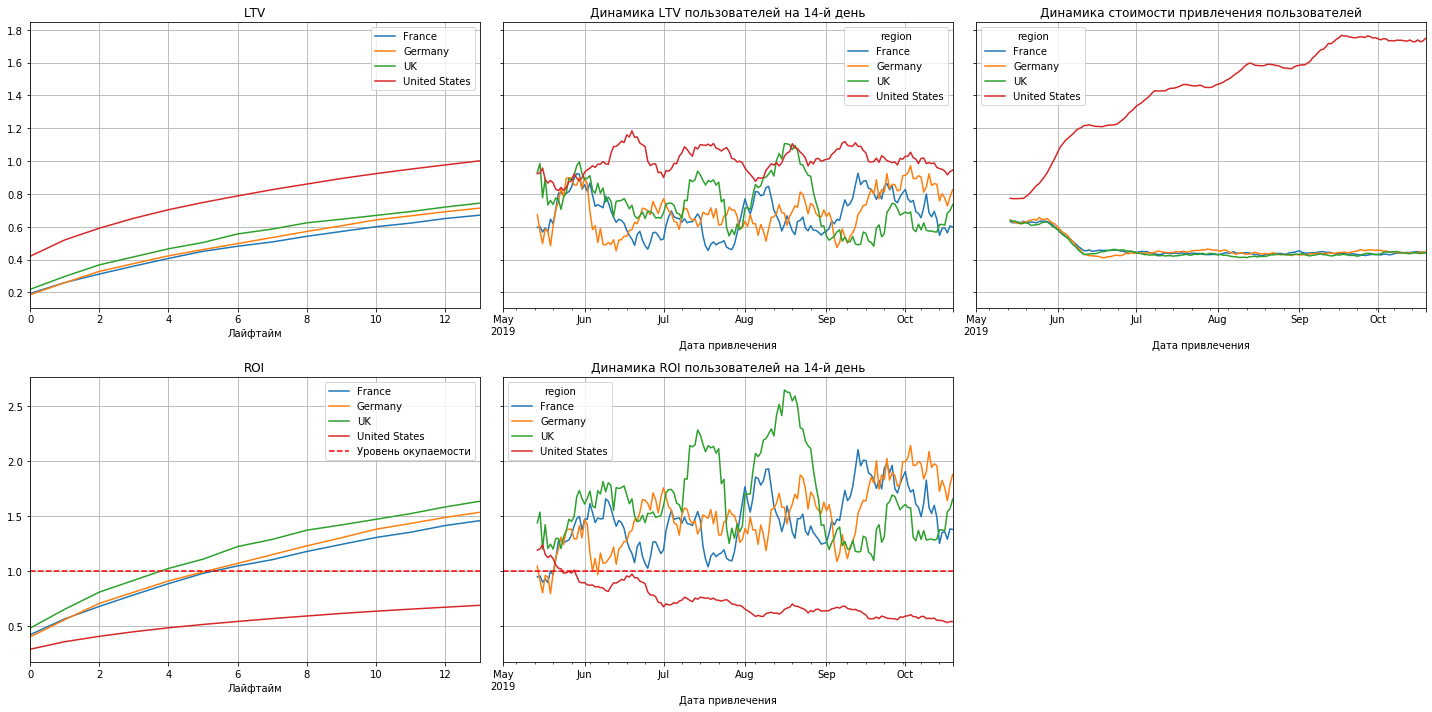

In [60]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Вывод: Стоимость привдечения пользователе из США на порядок выше, чем из других стран
И это единсвтенная страна с отрицательным ROI

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

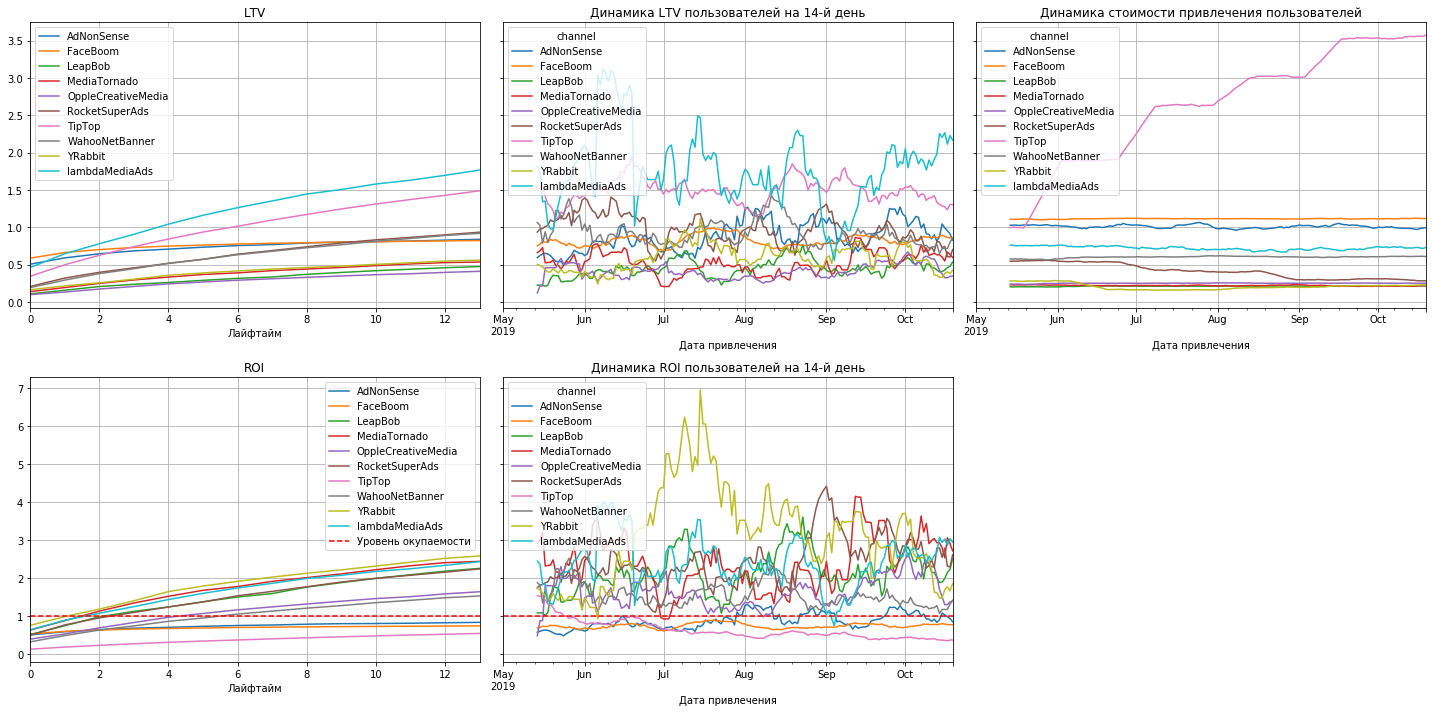

In [61]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Вывод, Реклама в Тиктоке оказалась провальной. В этом основная беда. 

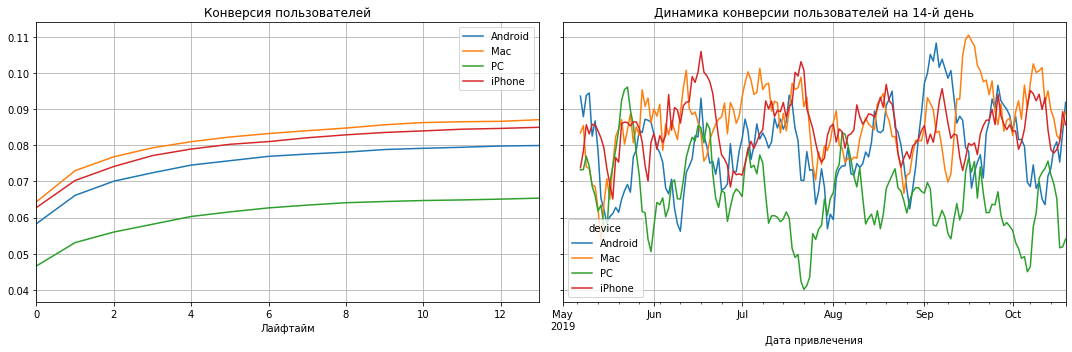

In [62]:
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

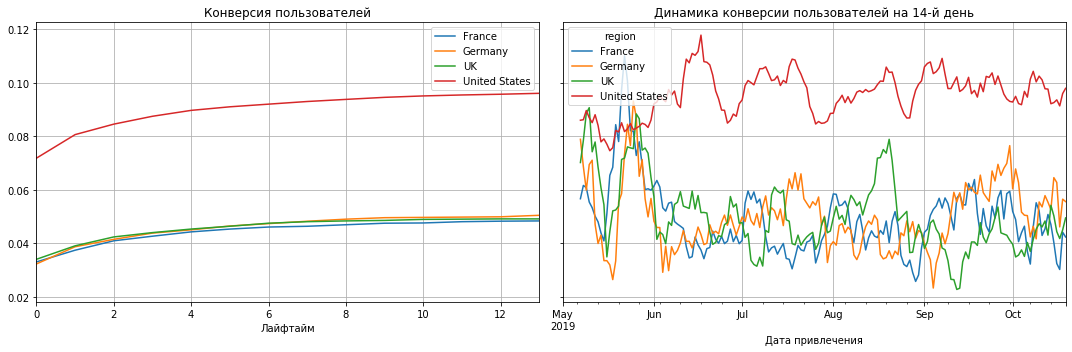

In [63]:
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

<div class="alert alert-danger>
<b>Комментарий ревьюера v.1</b> 
    
✍ Екатерина, мне кажется, что мы упустили пункт из задания "Постройте и изучите графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам." - пожалуйста, добавь эти исследования в проект.

</div>

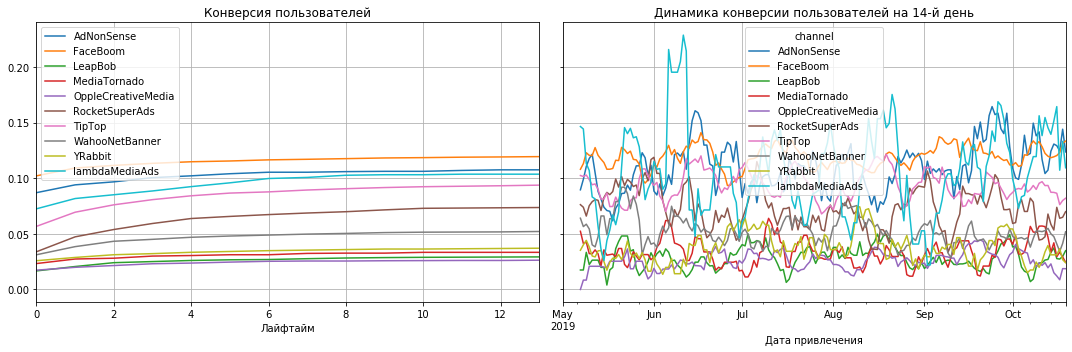

In [64]:
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

<div class="alert alert-info"> 
<b>Комментарий студента</b> 
    
Поарвила данные по конверсиям
Выводы: 
    хуже всего конвертируются пользоватиели с ПК
    По регионам безусловный лидер  - Штаты
    По каналам. - faceboom
    
</div>

# Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

Итоговые выводы:
Причины неэффектиности: один канал рекламы показыл большую неээфектиновсть - Тикток
Регион: пользователи из США не окупаются
Устройства Apple не приносят прибыли (работа прилродения на этом устройстве)


Рекомендации марктеингу:

1. Разобраться с Тиктоком: он не эффективен везде? или только в США? Почему не эффективен (некорретный таргет? не подходящие креативы?)
2. Уменьшить бюджет США в пользу других регионов. ПРоверить гипотезу попытки выхода на рынок США (были ли там раньше?) и момент начала закупки рекламы в Тиктоке.
3. Тех отделу проверить баги на утсройствах Apple